In [1]:
import numpy as np
from pylab import plt
import seaborn as sns
import plotly.plotly as py
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [2]:
plt.style.use('seaborn')
%matplotlib inline
init_notebook_mode(connected=True)

In [3]:
import fxcmpy
con = fxcmpy.fxcmpy(config_file = 'fxcm.cfg', server='demo')

In [30]:
symbol_info = con.get_offers(kind='dataframe')

In [31]:
symbol_swap = symbol_info[['currency', 'rollB', 'rollS']]
symbol_swap.index = symbol_swap['currency']
symbol_swap.drop(['currency'],axis=1, inplace=True)
symbol_swap

,rollB,rollS
currency,,
EUR/USD,-38.400,18.000
USD/JPY,13.590,-28.110
GBP/USD,-26.760,12.510
USD/CHF,17.970,-39.210
EUR/CHF,2.310,-4.920
AUD/USD,-3.390,1.260
USD/CAD,4.230,-8.700
NZD/USD,-10.560,2.970
EUR/GBP,-14.670,7.440


In [24]:
symbols = con.get_instruments()
#symbols = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CAD', 'USD/CHF', 'AUD/USD', 'NZD/USD']

In [25]:
df = dict()
for symbol in symbols:
    df[symbol] = con.get_candles(symbol, period='D1', number=756)
    df[symbol]['Close'] = (df[symbol]['bidclose'] + df[symbol]['askclose'])/2

In [26]:
last_price = dict()
for symbol in symbols:
    last_price[symbol] = (df[symbol].iloc[-1]['bidclose'] + df[symbol].iloc[-1]['askclose'])/2

In [27]:
num_bar = -252
newdf = dict()
for symbol in symbols:
    newdf[symbol] = df[symbol].iloc[num_bar:-1]

In [28]:
newdf['EUR/USD'].head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close
date,,,,,,,,,,
2018-04-15 21:00:00,1.23286,1.23314,1.23371,1.23263,1.23339,1.23371,1.23428,1.23306,50,1.233425
2018-04-16 21:00:00,1.23314,1.23783,1.23940,1.23212,1.23371,1.23807,1.23953,1.23246,175852,1.237950
2018-04-17 21:00:00,1.23783,1.23681,1.24131,1.23356,1.23807,1.23714,1.24144,1.23367,184726,1.236975
2018-04-18 21:00:00,1.23681,1.23728,1.23966,1.23409,1.23714,1.23747,1.23979,1.23425,216995,1.237375
2018-04-19 21:00:00,1.23728,1.23442,1.23996,1.23285,1.23747,1.23468,1.24008,1.23299,238867,1.234550


/anaconda2/envs/fxcm/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



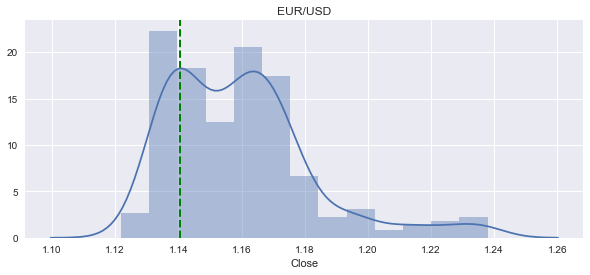

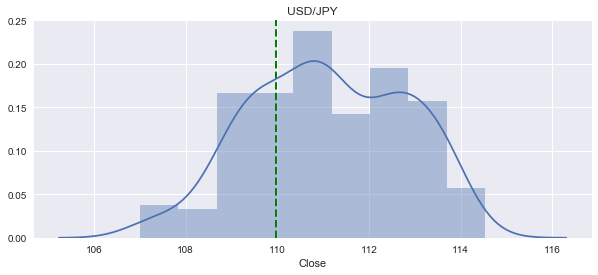

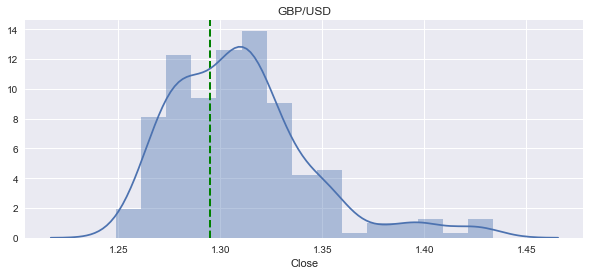

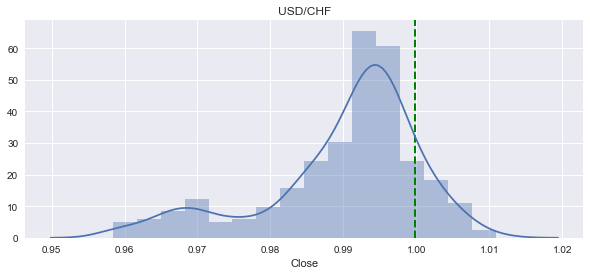

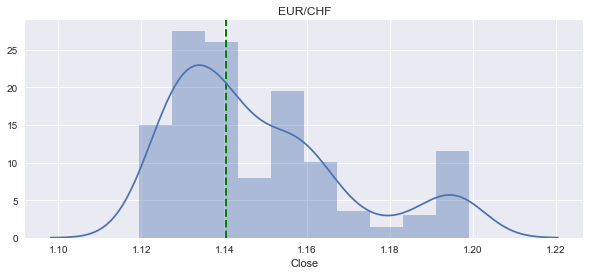

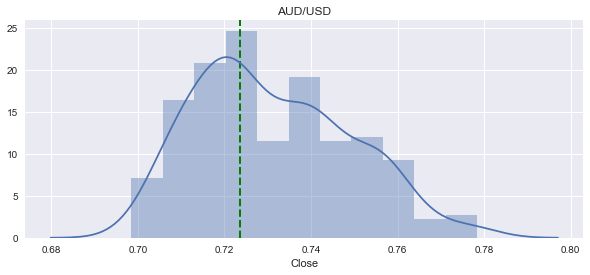

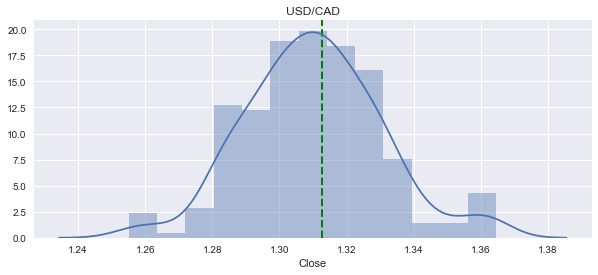

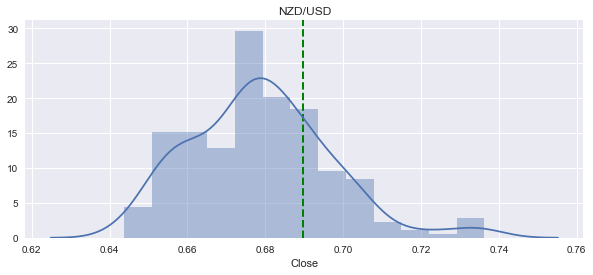

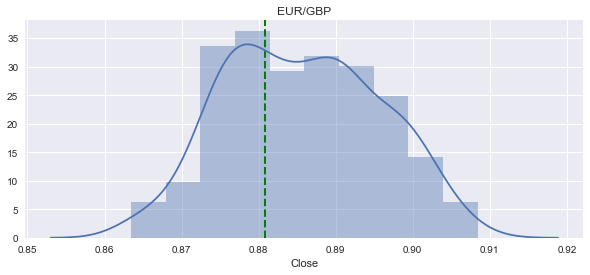

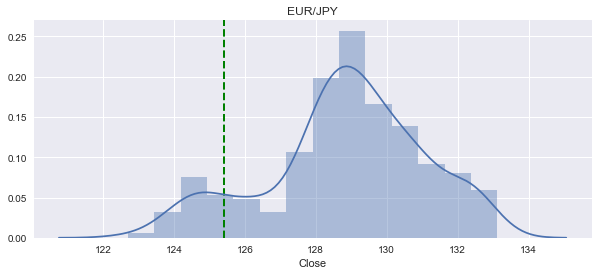

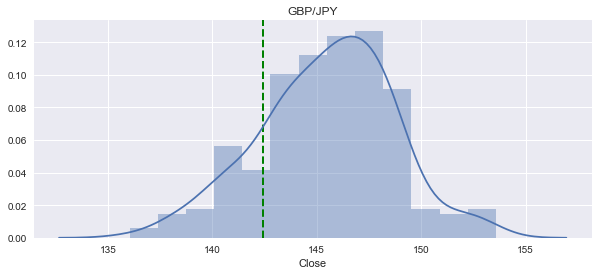

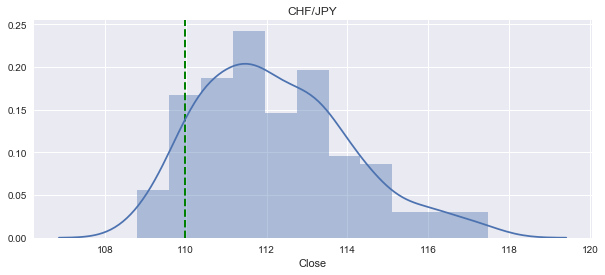

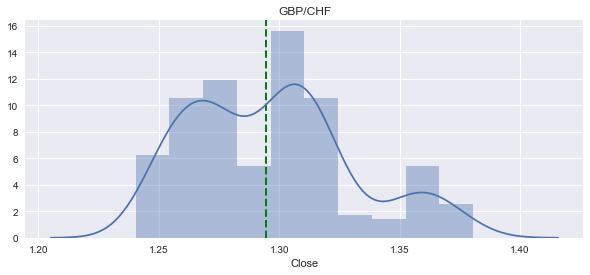

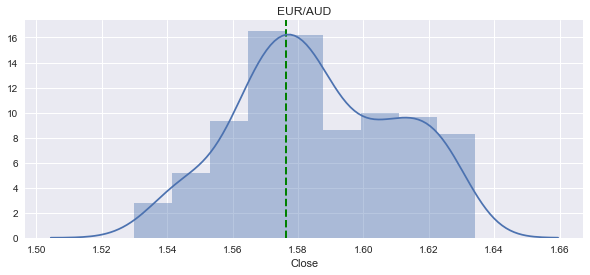

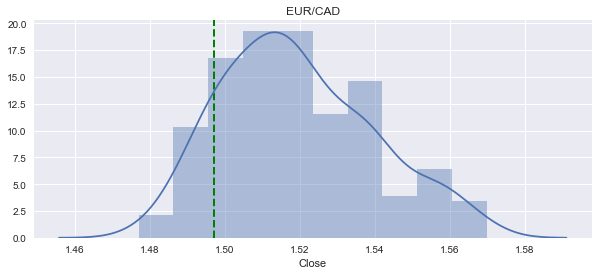

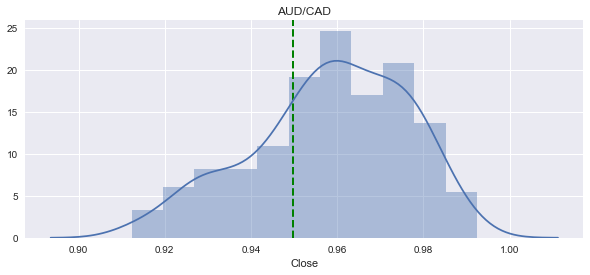

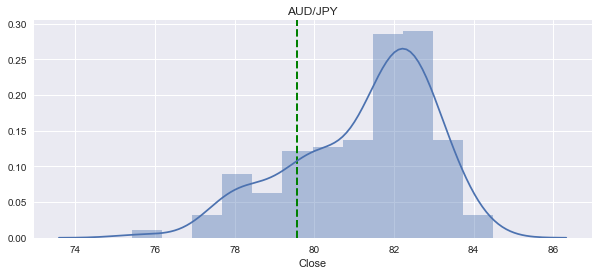

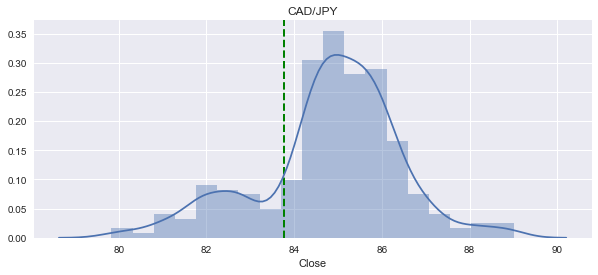

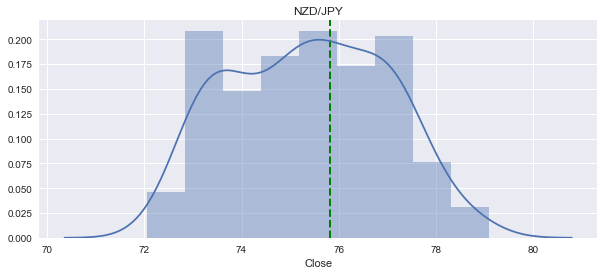

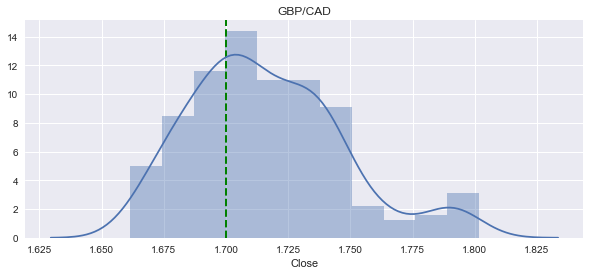

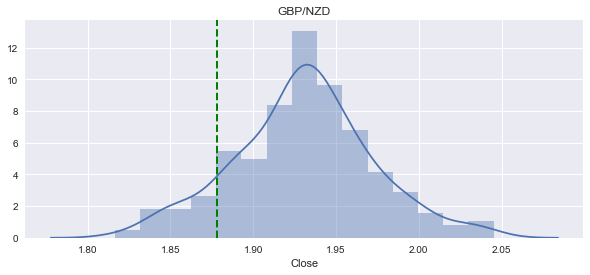

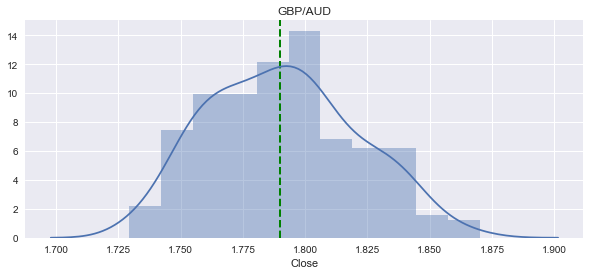

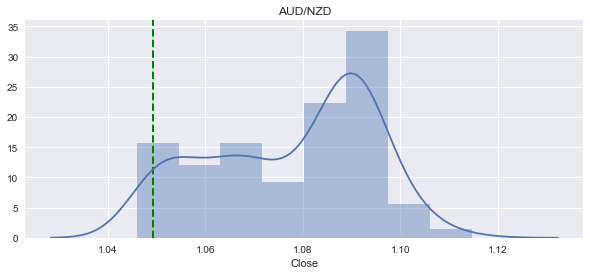

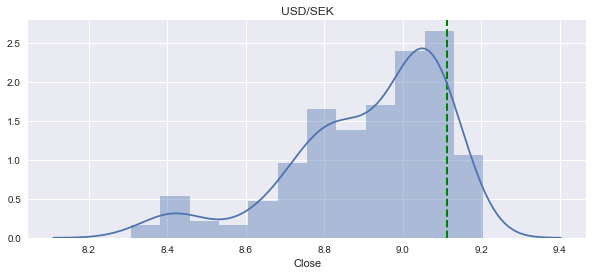

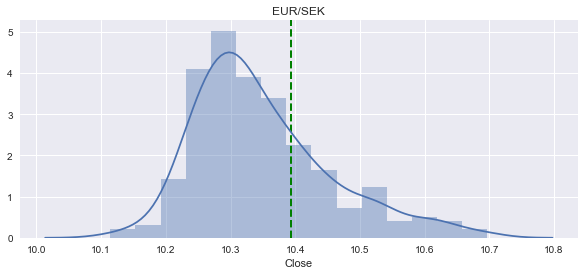

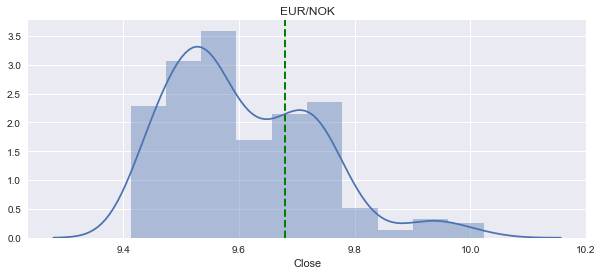

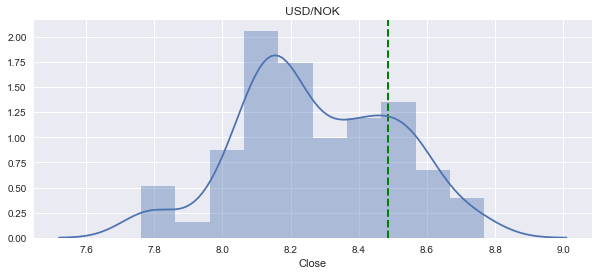

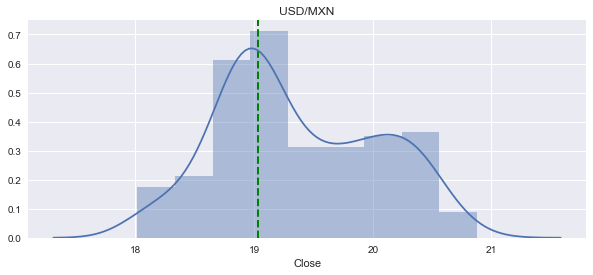

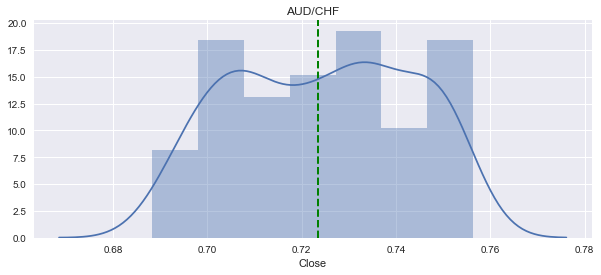

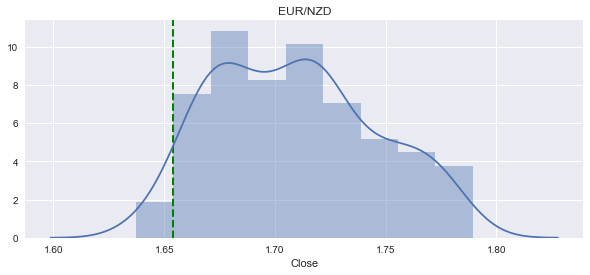

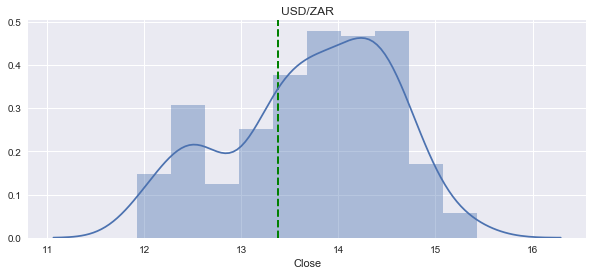

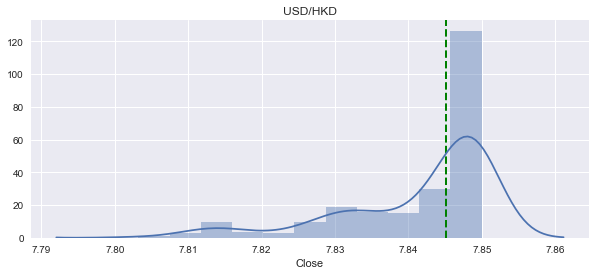

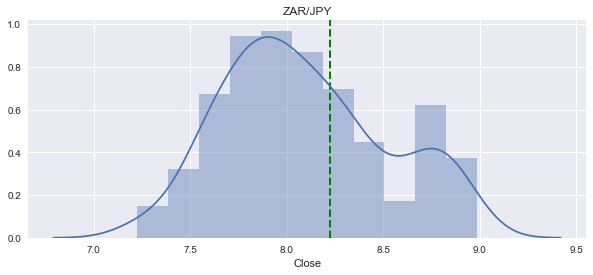

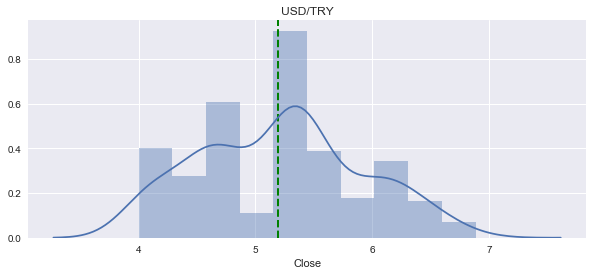

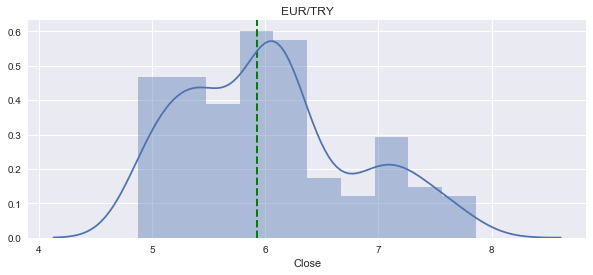

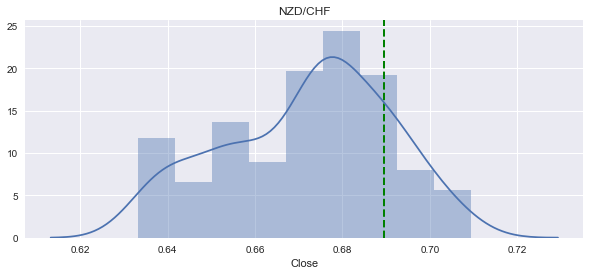

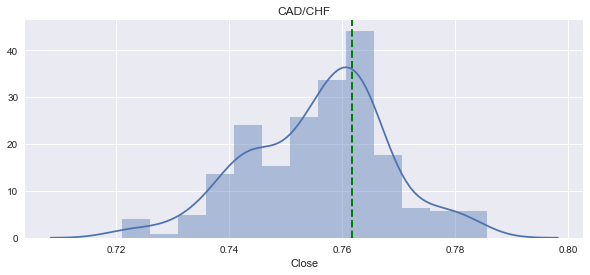

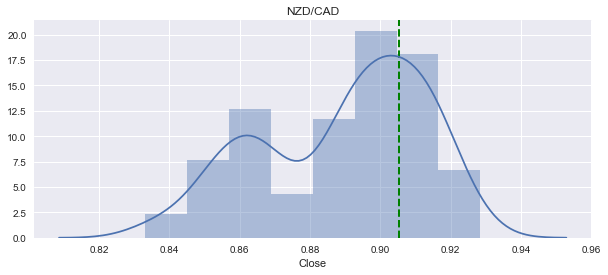

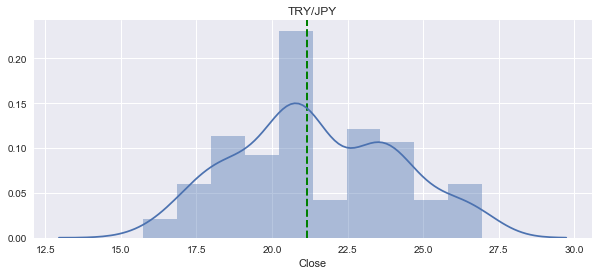

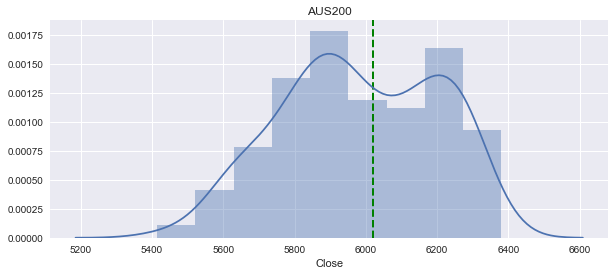

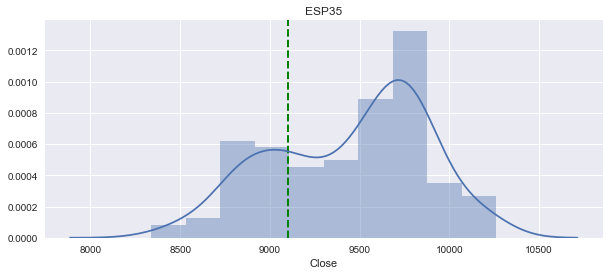

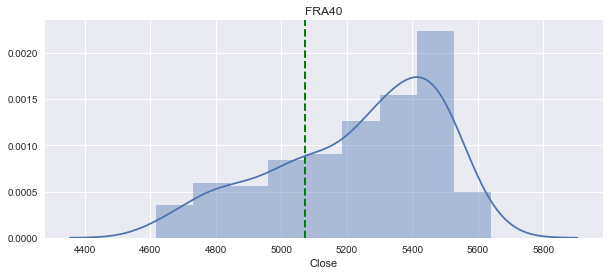

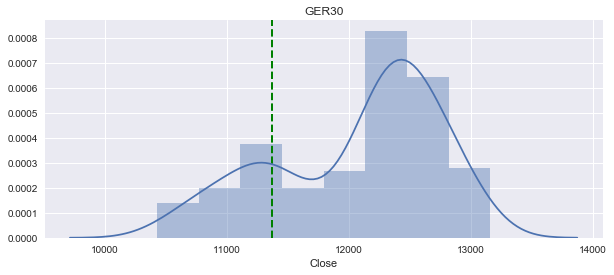

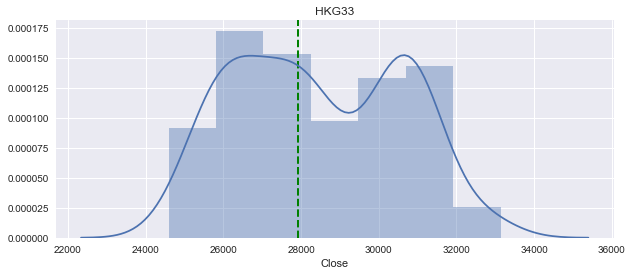

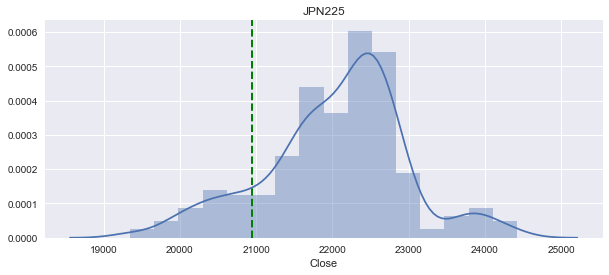

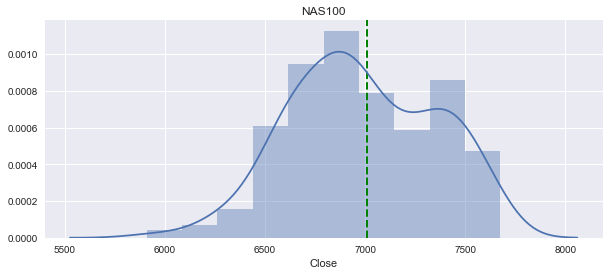

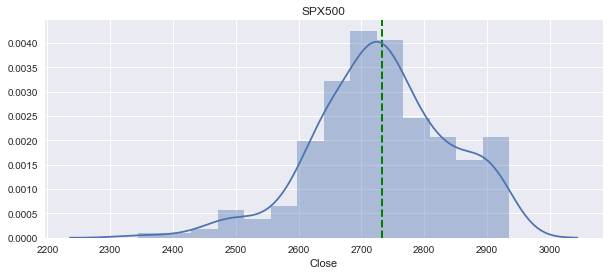

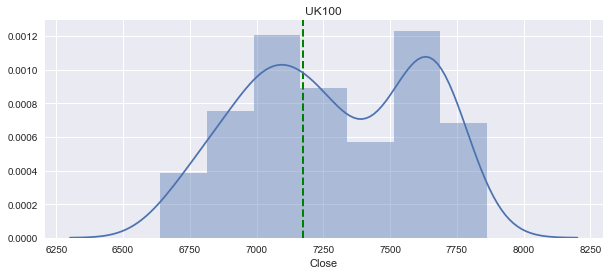

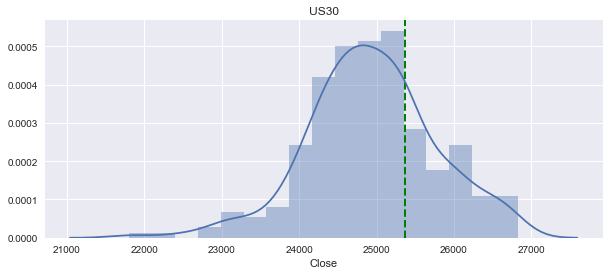

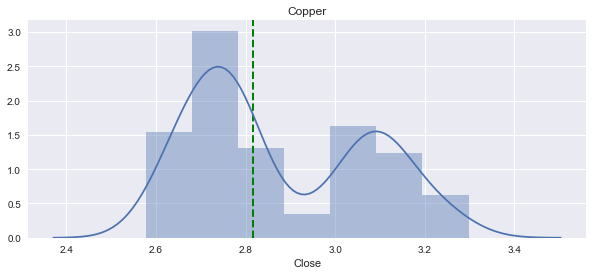

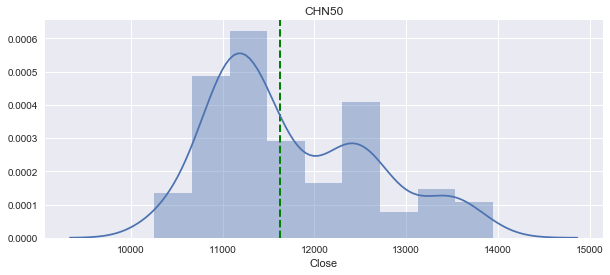

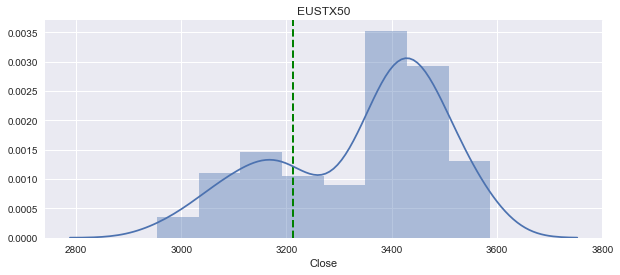

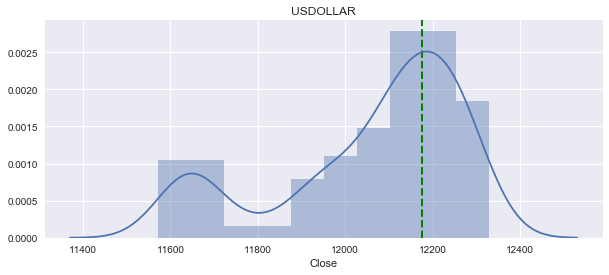

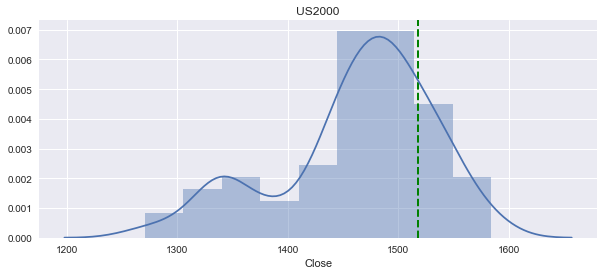

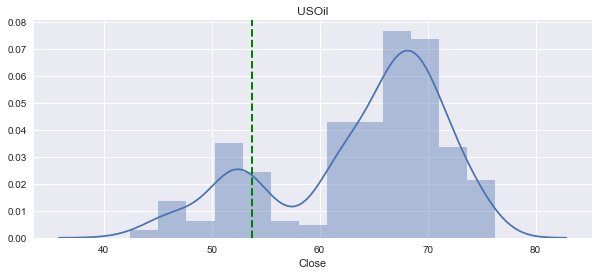

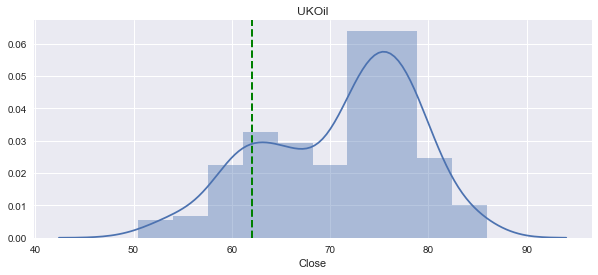

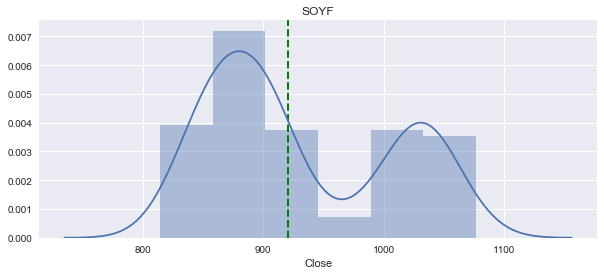

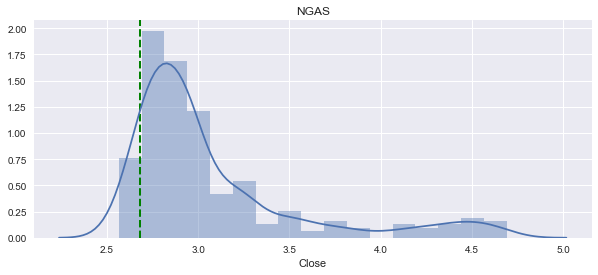

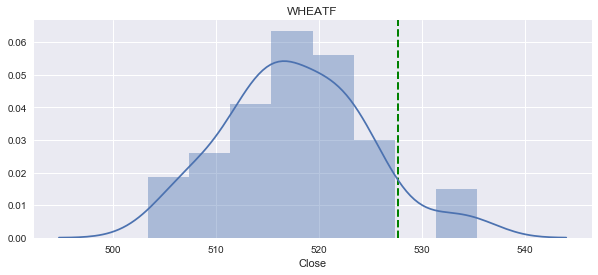

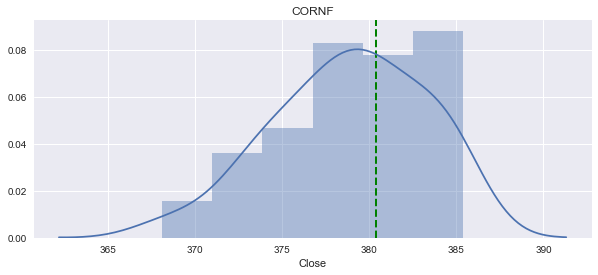

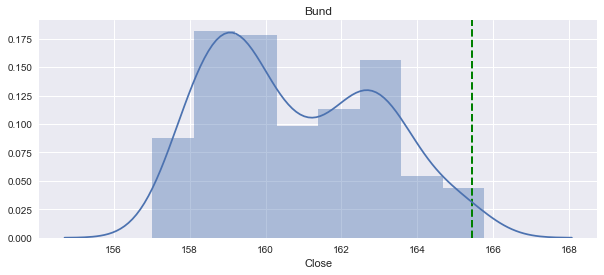

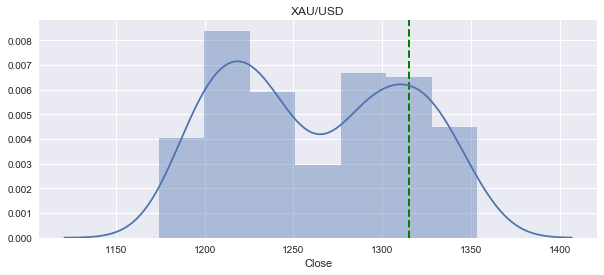

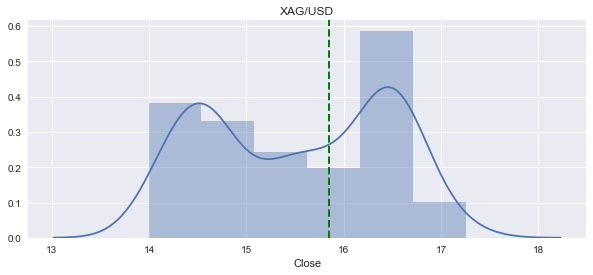

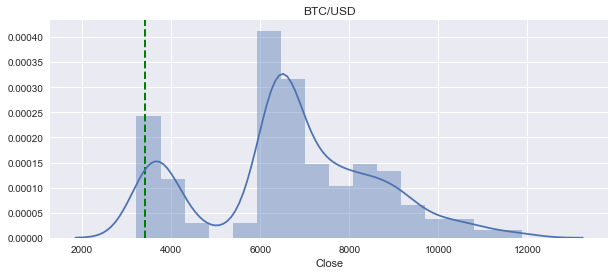

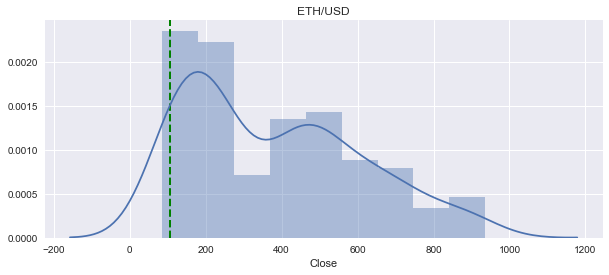

In [29]:
for symbol in symbols:
    plt.figure(figsize=(10,4))
    plt.axvline(x=last_price[symbol], color='green', linestyle='--', linewidth=2)
    plt.title(symbol)
    sns.distplot(newdf[symbol]['Close'])

In [34]:
position = {
    'USD/CHF': { 'open': 0.99444 },
    'USD/JPY': { 'open': 109.689 },
    'NZD/USD': { 'open': 0.68898 }
}

In [37]:
def getRP(price, symbol, stoploss):
    exchange = {
        'USD': 1,
        'JPY': 0.00910254,
        'CAD': 0.763864,
        'CHF': 1.00342,
        'GBP': 1.29598
    }
    point = 10000
    pipval = 10/100
    rp = (price - stoploss) * point * pipval
    s = symbol.split('/')
    rp = rp * exchange[s[1]]
    return rp

SWAP Table
           rollB   rollS
currency                
EUR/USD  -38.400  18.000
USD/JPY   13.590 -28.110
GBP/USD  -26.760  12.510
USD/CHF   17.970 -39.210
EUR/CHF    2.310  -4.920
AUD/USD   -3.390   1.260
USD/CAD    4.230  -8.700
NZD/USD  -10.560   2.970
EUR/GBP  -14.670   7.440
EUR/JPY   -5.730   1.950
AUD/JPY    9.030 -18.480
FRA40     -0.040  -0.050
GER30     -0.100  -0.100
NAS100    -0.110  -0.010
UK100     -0.100  -0.040
US30      -0.410  -0.020
XAU/USD   -0.240  -0.030
XAG/USD   -0.030  -0.006
BTC/USD   -0.023   0.007


EUR/USD Zone [stop@4SD]
swap: 
rollB   -38.4
rollS    18.0
Name: EUR/USD, dtype: float64
zone1: $173.0
zone2: $137.0
zone3: $91.0
zone4: $46.0
Total RP: $447.0


USD/JPY Zone [stop@4SD]
swap: 
rollB    13.59
rollS   -28.11
Name: USD/JPY, dtype: float64
zone1: $93.0
zone2: $92.0
zone3: $61.0
zone4: $31.0
Total RP: $277.0


GBP/USD Zone [stop@4SD]
swap: 
rollB   -26.76
rollS    12.51
Name: GBP/USD, dtype: float64
zone1: $265.0
zone2: $206.0
zone3: $137.0
zone4

KeyError: 'GBP/JPY'

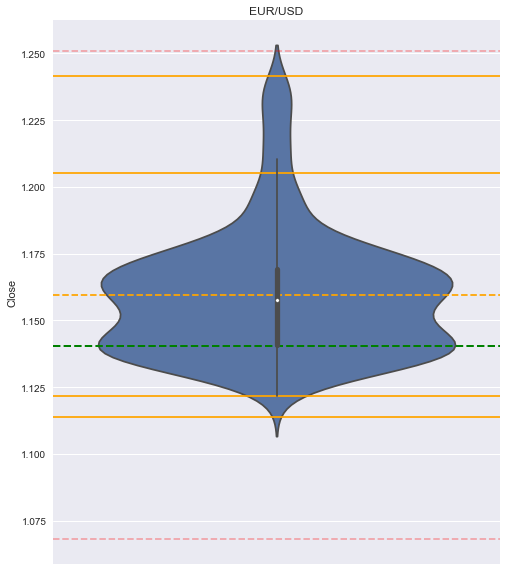

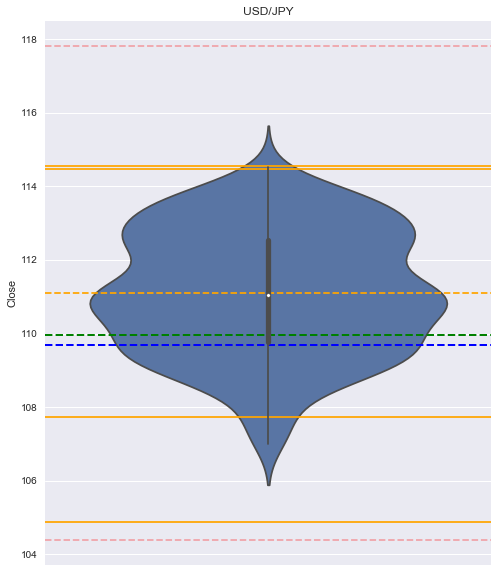

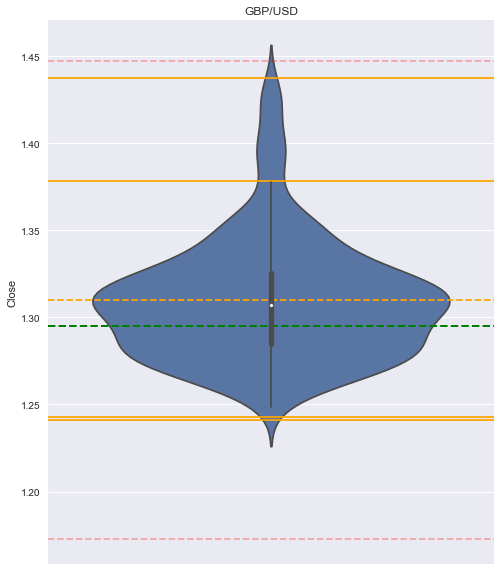

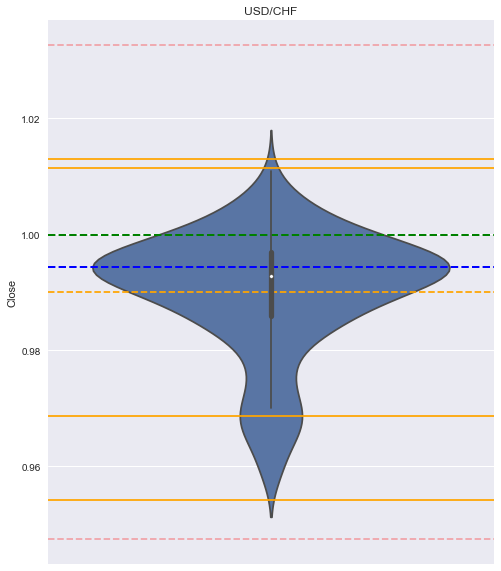

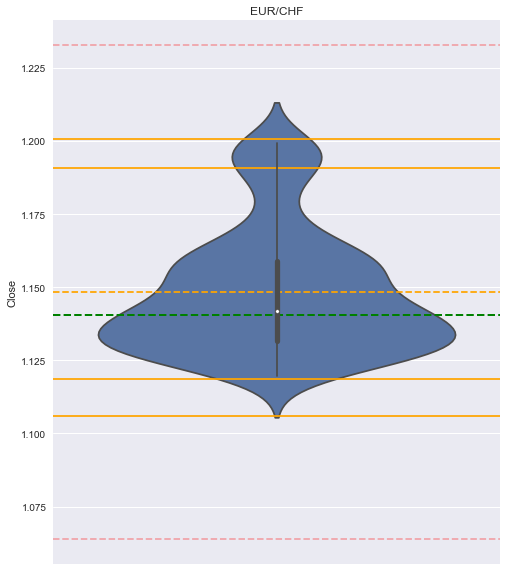

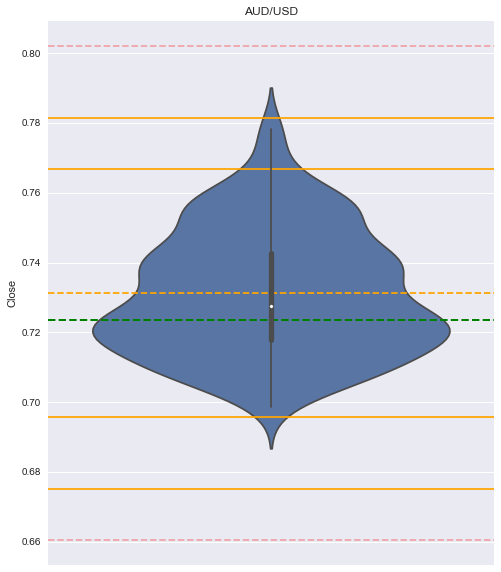

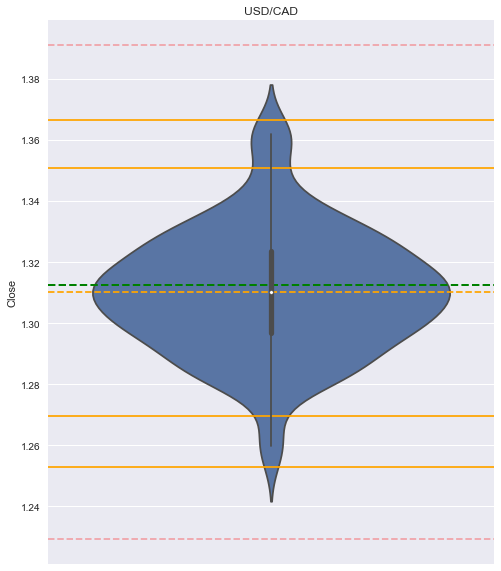

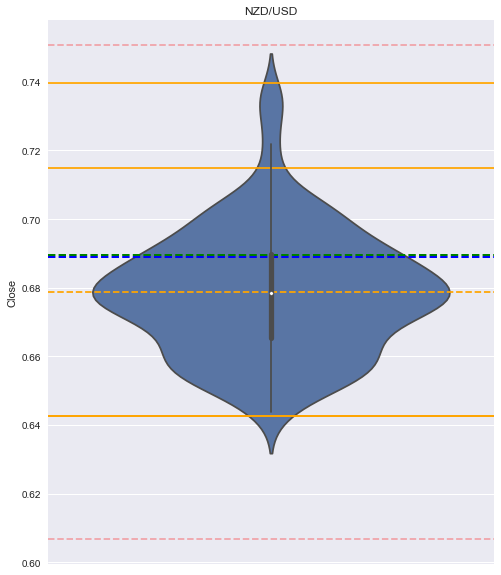

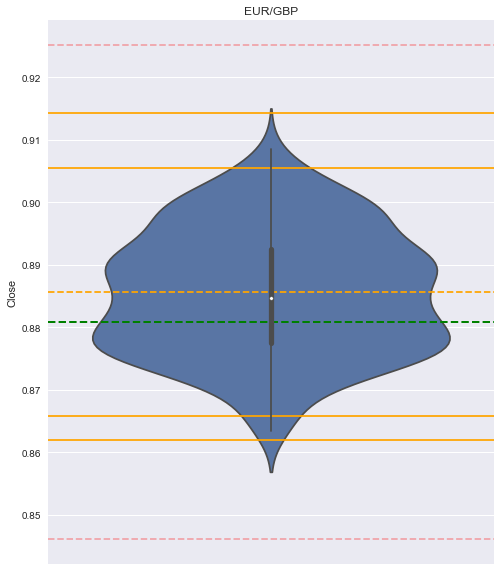

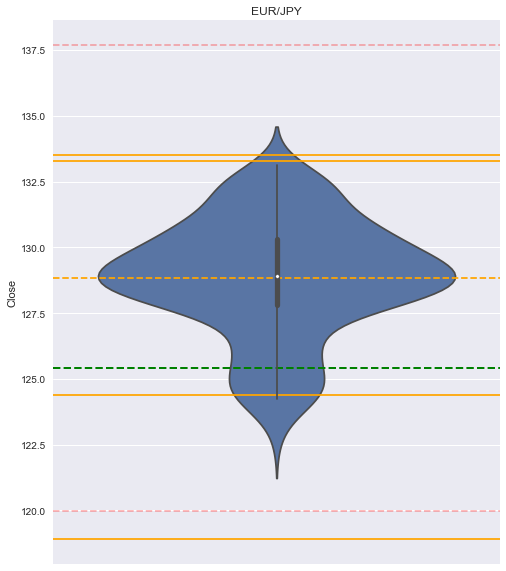

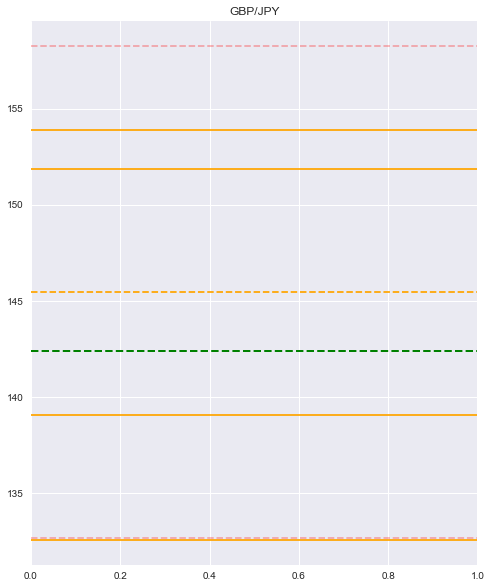

In [38]:
print('SWAP Table')
print(symbol_swap)
print('\n')
for symbol in symbols:
    
    mean = np.mean(newdf[symbol]['Close'])
    sd = np.std(newdf[symbol]['Close'])
    high = np.max(newdf[symbol]['askhigh'])
    low = np.min(newdf[symbol]['asklow'])
     
    plt.figure(figsize=(8,10))
    plt.axhline(y=last_price[symbol], color='green', linestyle='--', linewidth=2)
    plt.axhline(y=mean, color='orange', linestyle='--')
    plt.axhline(y=mean+sd*2, color='orange')
    plt.axhline(y=mean-sd*2, color='orange')
    plt.axhline(y=high, color='orange')
    plt.axhline(y=low, color='orange')
    plt.axhline(y=mean+sd*4, color='red', linestyle='--', alpha=0.3)
    plt.axhline(y=mean-sd*4, color='red', linestyle='--', alpha=0.3)
    plt.title(symbol)
    
    
    zone = [0, 1, 2, 3]
    bullet_zone = 1
    stoploss = mean-sd*4
    print(symbol + ' Zone [stop@4SD]')
    print("swap: \n" + str(symbol_swap.loc[symbol]))
    zone[0] = round(getRP(high, symbol, stoploss),0 )
    zone[1] = round(getRP(mean+sd*2, symbol, stoploss), 0)
    zone[2] = round(getRP(mean, symbol, stoploss), 0)
    zone[3] = round(getRP(mean-sd*2, symbol, stoploss), 0)
    for i in range(4):    
        print("zone" + str(i+1) + ": $" + str(zone[i] * bullet_zone))
    
    z = np.array(zone)
    print("Total RP: $" + str(z.sum() * bullet_zone))
    
    
    print("\n")
    
    if symbol in position:
        plt.axhline(y=position[symbol]['open'], color='blue', linestyle='--', linewidth=2)
        
    sns.violinplot(y=newdf[symbol]['Close'])

In [39]:
newdf['GBP/JPY']

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close
date,,,,,,,,,,
2018-04-12 21:00:00,151.343,152.624,152.873,151.161,151.467,152.770,152.897,151.187,267292,152.6970
2018-04-13 21:00:00,152.624,152.797,153.839,152.576,152.770,152.960,153.869,152.603,245932,152.8785
2018-04-16 21:00:00,152.797,153.530,153.755,152.645,152.960,153.618,153.778,152.673,218531,153.5740
2018-04-17 21:00:00,153.530,152.827,153.746,152.773,153.618,152.962,153.770,152.798,207163,152.8945
2018-04-18 21:00:00,152.827,152.250,153.623,152.050,152.962,152.358,153.646,152.079,222017,152.3040
2018-04-19 21:00:00,152.250,151.165,152.950,151.074,152.358,151.318,152.975,151.105,259641,151.2415
2018-04-20 21:00:00,151.165,150.672,151.695,150.672,151.318,150.813,151.716,150.716,265221,150.7425
2018-04-22 21:00:00,150.672,150.868,150.970,150.752,150.813,151.004,151.082,150.847,458,150.9360
2018-04-23 21:00:00,150.868,151.518,151.639,150.714,151.004,151.563,151.658,150.799,219089,151.5405
